In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pickle
import os

In [ ]:
# Load data
df = pd.read_csv("Supermarket_Sales.csv")

In [ ]:
# Tampilkan data awal
print("Data Awal:")
display(df.head())

Data Awal:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


In [ ]:
# Preprocessing
df_reg = df[['Unit price', 'Quantity', 'Tax 5%', 'gross income']]
print("Data Setelah Preprocessing:")
display(df_reg.head())

Data Setelah Preprocessing:


,Unit price,Quantity,Tax 5%,gross income
0,74.69,7,26.1415,26.1415
1,15.28,5,3.8200,3.8200
2,46.33,7,16.2155,16.2155
3,58.22,8,23.2880,23.2880
4,86.31,7,30.2085,30.2085


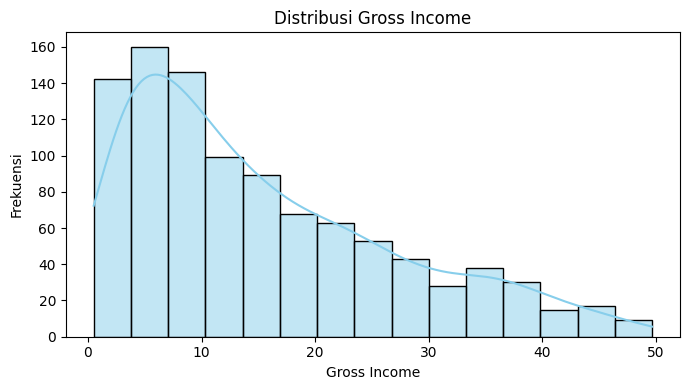

In [ ]:
# Histogram gross income
plt.figure(figsize=(7,4))
sns.histplot(df_reg['gross income'], kde=True, color="skyblue")
plt.title("Distribusi Gross Income")
plt.xlabel("Gross Income")
plt.ylabel("Frekuensi")
plt.tight_layout()
os.makedirs('../static', exist_ok=True)
plt.savefig('../static/histogram_gross_income.png')
plt.show()

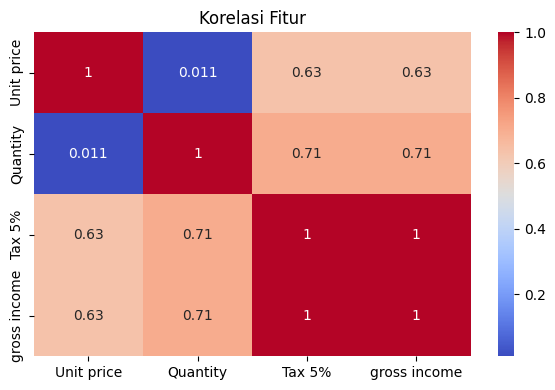

In [ ]:
# Korelasi fitur
plt.figure(figsize=(6,4))
sns.heatmap(df_reg.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur")
plt.tight_layout()
os.makedirs('../static', exist_ok=True)
plt.savefig('../static/heatmap_korelasi_fitur.png')
plt.show()

In [ ]:
# Split data
X = df_reg[['Unit price', 'Quantity', 'Tax 5%']]
y = df_reg['gross income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Simpan model ke folder save_model
os.makedirs('../save_model', exist_ok=True)
with open('../save_model/linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)